## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [14]:
#from __future__ import absolute_import, division, print_function, unicode_literals

import os
import keras
import itertools



import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from keras.regularizers import l1, l2, l1_l2
from keras.layers import BatchNormalization
from keras.layers import Dropout

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [23]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 128, 64], l2_ratio=1e-4, drp_ratio=0.1):
    
    input_layer = keras.layers.Input(input_shape)
    x = BatchNormalization()(input_layer)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   #activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(x)
            
            x = keras.layers.Activation(activation="relu")(x)
            x = BatchNormalization()(x)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   #activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
            x = keras.layers.Activation(activation="relu")(x)
            x = BatchNormalization()(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [24]:
"""Code Here
設定超參數
"""

LEARNING_RATE = 1e-2
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = 0.1


In [25]:
#results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(input_shape=x_train.shape[1:], output_units=10, num_neurons=[512, 256, 128, 128, 64], l2_ratio=1e-4, drp_ratio=Dropout_EXP)
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_33 (Batc (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
activation_27 (Activation)   (None, 512)               0         
_________________________________________________________________
batch_normalization_34 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_26 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
__________

50000/50000 [==============================] - 16s 311us/step - loss: 0.7885 - acc: 0.7870 - val_loss: 1.6069 - val_acc: 0.5689
Epoch 36/50
50000/50000 [==============================] - 15s 310us/step - loss: 0.7808 - acc: 0.7879 - val_loss: 1.6535 - val_acc: 0.5597
Epoch 37/50
50000/50000 [==============================] - 16s 315us/step - loss: 0.7669 - acc: 0.7945 - val_loss: 1.6303 - val_acc: 0.5696
Epoch 38/50
50000/50000 [==============================] - 16s 311us/step - loss: 0.7541 - acc: 0.7998 - val_loss: 1.6917 - val_acc: 0.5608
Epoch 39/50
50000/50000 [==============================] - 16s 314us/step - loss: 0.7533 - acc: 0.8019 - val_loss: 1.6709 - val_acc: 0.5629
Epoch 40/50
50000/50000 [==============================] - 16s 318us/step - loss: 0.7361 - acc: 0.8077 - val_loss: 1.7091 - val_acc: 0.5683
Epoch 41/50
50000/50000 [==============================] - 16s 315us/step - loss: 0.7274 - acc: 0.8110 - val_loss: 1.7033 - val_acc: 0.5630
Epoch 42/50
50000/50000 [=======

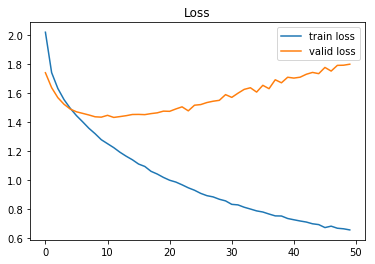

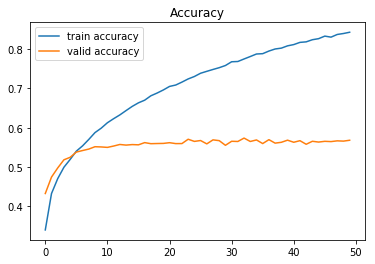

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()